
#Import all requierd Libraries


In [17]:
# import all tools we need

#Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We want our plots to be appeared inside the notebook
%matplotlib inline

# Models from sickit-learn(sklearn)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc


from sklearn import metrics
from sklearn.metrics import roc_curve

# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

#Libraries for Neural Network Based model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



#Read Data

In [2]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Move to desired directory
%cd /content/drive/MyDrive/Research Works/CS6375/Programming Project/

/content/drive/MyDrive/Research Works/CS6375/Programming Project


In [4]:
ls

 data/  'Programming Project.ipynb'   weights_ANN.h5


In [5]:
df=pd.read_csv('data/Acoustic Features.csv')

#Regular EDA(exploratory data analysis)

In [ ]:
#show only last 5 rows
df.head(5)

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [ ]:
#show only last 5 rows
df.tail()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969
399,angry,0.086,0.475,5.343,151.748,2.240,-0.014,0.834,-0.021,0.345,...,0.099,1.000,0.094,0.033,0.195,0.110,0.007,0.641,0.848,0.965


In [ ]:
# transpose the dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Class,relax,relax,relax,relax,relax,relax,relax,relax,relax,relax,...,angry,angry,angry,angry,angry,angry,angry,angry,angry,angry
_RMSenergy_Mean,0.052,0.125,0.046,0.135,0.066,0.137,0.123,0.103,0.145,0.129,...,0.201,0.08,0.097,0.071,0.075,0.174,0.176,0.187,0.14,0.086
_Lowenergy_Mean,0.591,0.439,0.639,0.603,0.591,0.51,0.533,0.575,0.542,0.618,...,0.53,0.599,0.502,0.662,0.528,0.578,0.498,0.557,0.573,0.475
_Fluctuation_Mean,9.136,6.68,10.578,10.442,9.769,7.664,7.483,7.006,6.846,8.668,...,5.831,5.581,6.844,5.102,4.437,5.265,5.042,4.724,4.47,5.343
_Tempo_Mean,130.043,142.24,188.154,65.991,88.89,116.044,136.444,141.132,82.048,93.02,...,118.455,109.533,97.563,170.061,128.347,161.144,179.787,134.032,113.6,151.748
_MFCC_Mean_1,3.997,4.058,2.775,2.841,3.217,2.313,4.572,3.495,4.01,2.318,...,2.797,2.255,2.049,2.677,1.682,2.985,2.79,1.672,1.997,2.24
_MFCC_Mean_2,0.363,0.516,0.903,1.552,0.228,-0.082,1.171,0.553,0.55,0.744,...,-0.386,0.172,-0.31,-0.037,0.576,0.065,-0.148,0.566,-0.21,-0.014
_MFCC_Mean_3,0.887,0.785,0.502,0.612,0.814,0.365,0.939,0.275,0.568,0.537,...,0.587,0.448,0.747,0.883,0.726,0.718,0.342,0.88,0.694,0.834
_MFCC_Mean_4,0.078,0.397,0.329,0.351,0.096,0.033,0.358,0.269,0.559,-0.116,...,-0.105,0.218,0.006,-0.073,0.432,0.046,-0.011,-0.113,0.089,-0.021
_MFCC_Mean_5,0.221,0.556,0.287,0.011,0.434,-0.136,0.024,0.257,0.218,0.119,...,0.284,-0.038,-0.069,0.027,0.259,0.265,0.029,0.244,0.206,0.345


In [ ]:
#shape of the dataset
df.shape

(400, 51)

In [ ]:
# Let's find out how many of each class there
df["Class"].value_counts()

relax    100
happy    100
sad      100
angry    100
Name: Class, dtype: int64

<Axes: >

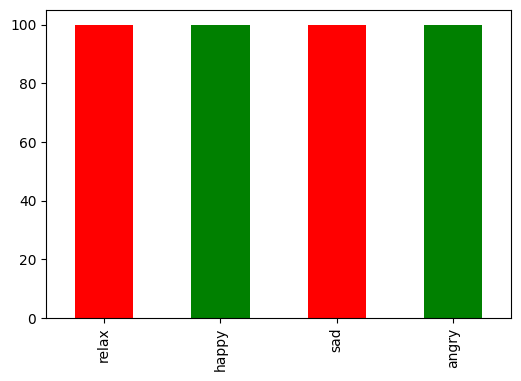

In [ ]:
#Class Distributions
df["Class"].value_counts().plot(figsize=(6,4),kind="bar",color=["red","green"])
#You can save the plot in your computer as well with the following line
#plt.savefig('plots/Language.png')

In [ ]:
# Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [ ]:
# Are there any missing value in this dataset?
df.isna().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [ ]:
#Descriptive statistics(e.g. central tendency, dispersion and shape) of a dataset’s distribution.
df.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [ ]:
# Feature correlation matrix
df.corr()

<ipython-input-30-788c399df2df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
_RMSenergy_Mean,1.000000,-0.281123,-0.170943,0.001018,-0.196514,-0.004046,0.058838,0.021011,-0.057344,-0.026006,...,0.116780,0.121314,0.134801,0.019755,-0.034969,-0.361005,-0.093959,0.138085,0.344589,0.017421
_Lowenergy_Mean,-0.281123,1.000000,0.051927,-0.041363,0.123084,0.128287,-0.064834,0.051065,0.017015,-0.011772,...,0.065676,-0.028428,0.091553,-0.030245,0.036964,0.212803,0.219543,-0.105146,-0.204983,-0.057252
_Fluctuation_Mean,-0.170943,0.051927,1.000000,-0.119922,0.077035,0.066078,-0.105724,0.052109,-0.049287,-0.125172,...,-0.063941,-0.130612,0.006006,-0.024852,0.228741,0.314950,0.079096,-0.044857,-0.237601,-0.024144
_Tempo_Mean,0.001018,-0.041363,-0.119922,1.000000,-0.065000,0.092282,0.018257,0.037973,0.072675,0.066078,...,0.042742,0.059773,0.021740,0.014066,-0.085568,-0.130662,-0.057506,0.016276,0.047717,0.103934
_MFCC_Mean_1,-0.196514,0.123084,0.077035,-0.065000,1.000000,0.020601,0.062331,0.035704,-0.095148,0.054577,...,-0.140808,-0.096281,-0.124380,-0.030001,-0.021792,0.415425,0.028937,-0.130964,-0.462958,-0.101777
_MFCC_Mean_2,-0.004046,0.128287,0.066078,0.092282,0.020601,1.000000,0.030869,0.381396,0.182625,0.202743,...,0.020501,0.011785,-0.099968,-0.027340,-0.053658,0.112911,0.148877,-0.040235,-0.145812,0.026345
_MFCC_Mean_3,0.058838,-0.064834,-0.105724,0.018257,0.062331,0.030869,1.000000,0.185289,0.104706,0.119881,...,-0.089810,0.008456,-0.054242,0.010879,-0.165410,-0.074145,0.081755,-0.041077,-0.016337,-0.077185
_MFCC_Mean_4,0.021011,0.051065,0.052109,0.037973,0.035704,0.381396,0.185289,1.000000,0.274641,0.358204,...,-0.037368,0.059997,-0.082904,-0.029550,-0.082057,-0.021947,0.123147,-0.061776,0.014821,-0.111811
_MFCC_Mean_5,-0.057344,0.017015,-0.049287,0.072675,-0.095148,0.182625,0.104706,0.274641,1.000000,0.377629,...,0.045591,0.004970,0.027684,0.028802,-0.082998,-0.105274,0.037048,0.028897,0.049388,0.000519
_MFCC_Mean_6,-0.026006,-0.011772,-0.125172,0.066078,0.054577,0.202743,0.119881,0.358204,0.377629,1.000000,...,-0.021079,0.070623,-0.030072,-0.087576,-0.119089,-0.081203,-0.011480,-0.044954,0.049903,-0.088279


<ipython-input-142-c1a2cb3760f7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx=df.corr()


<Axes: >

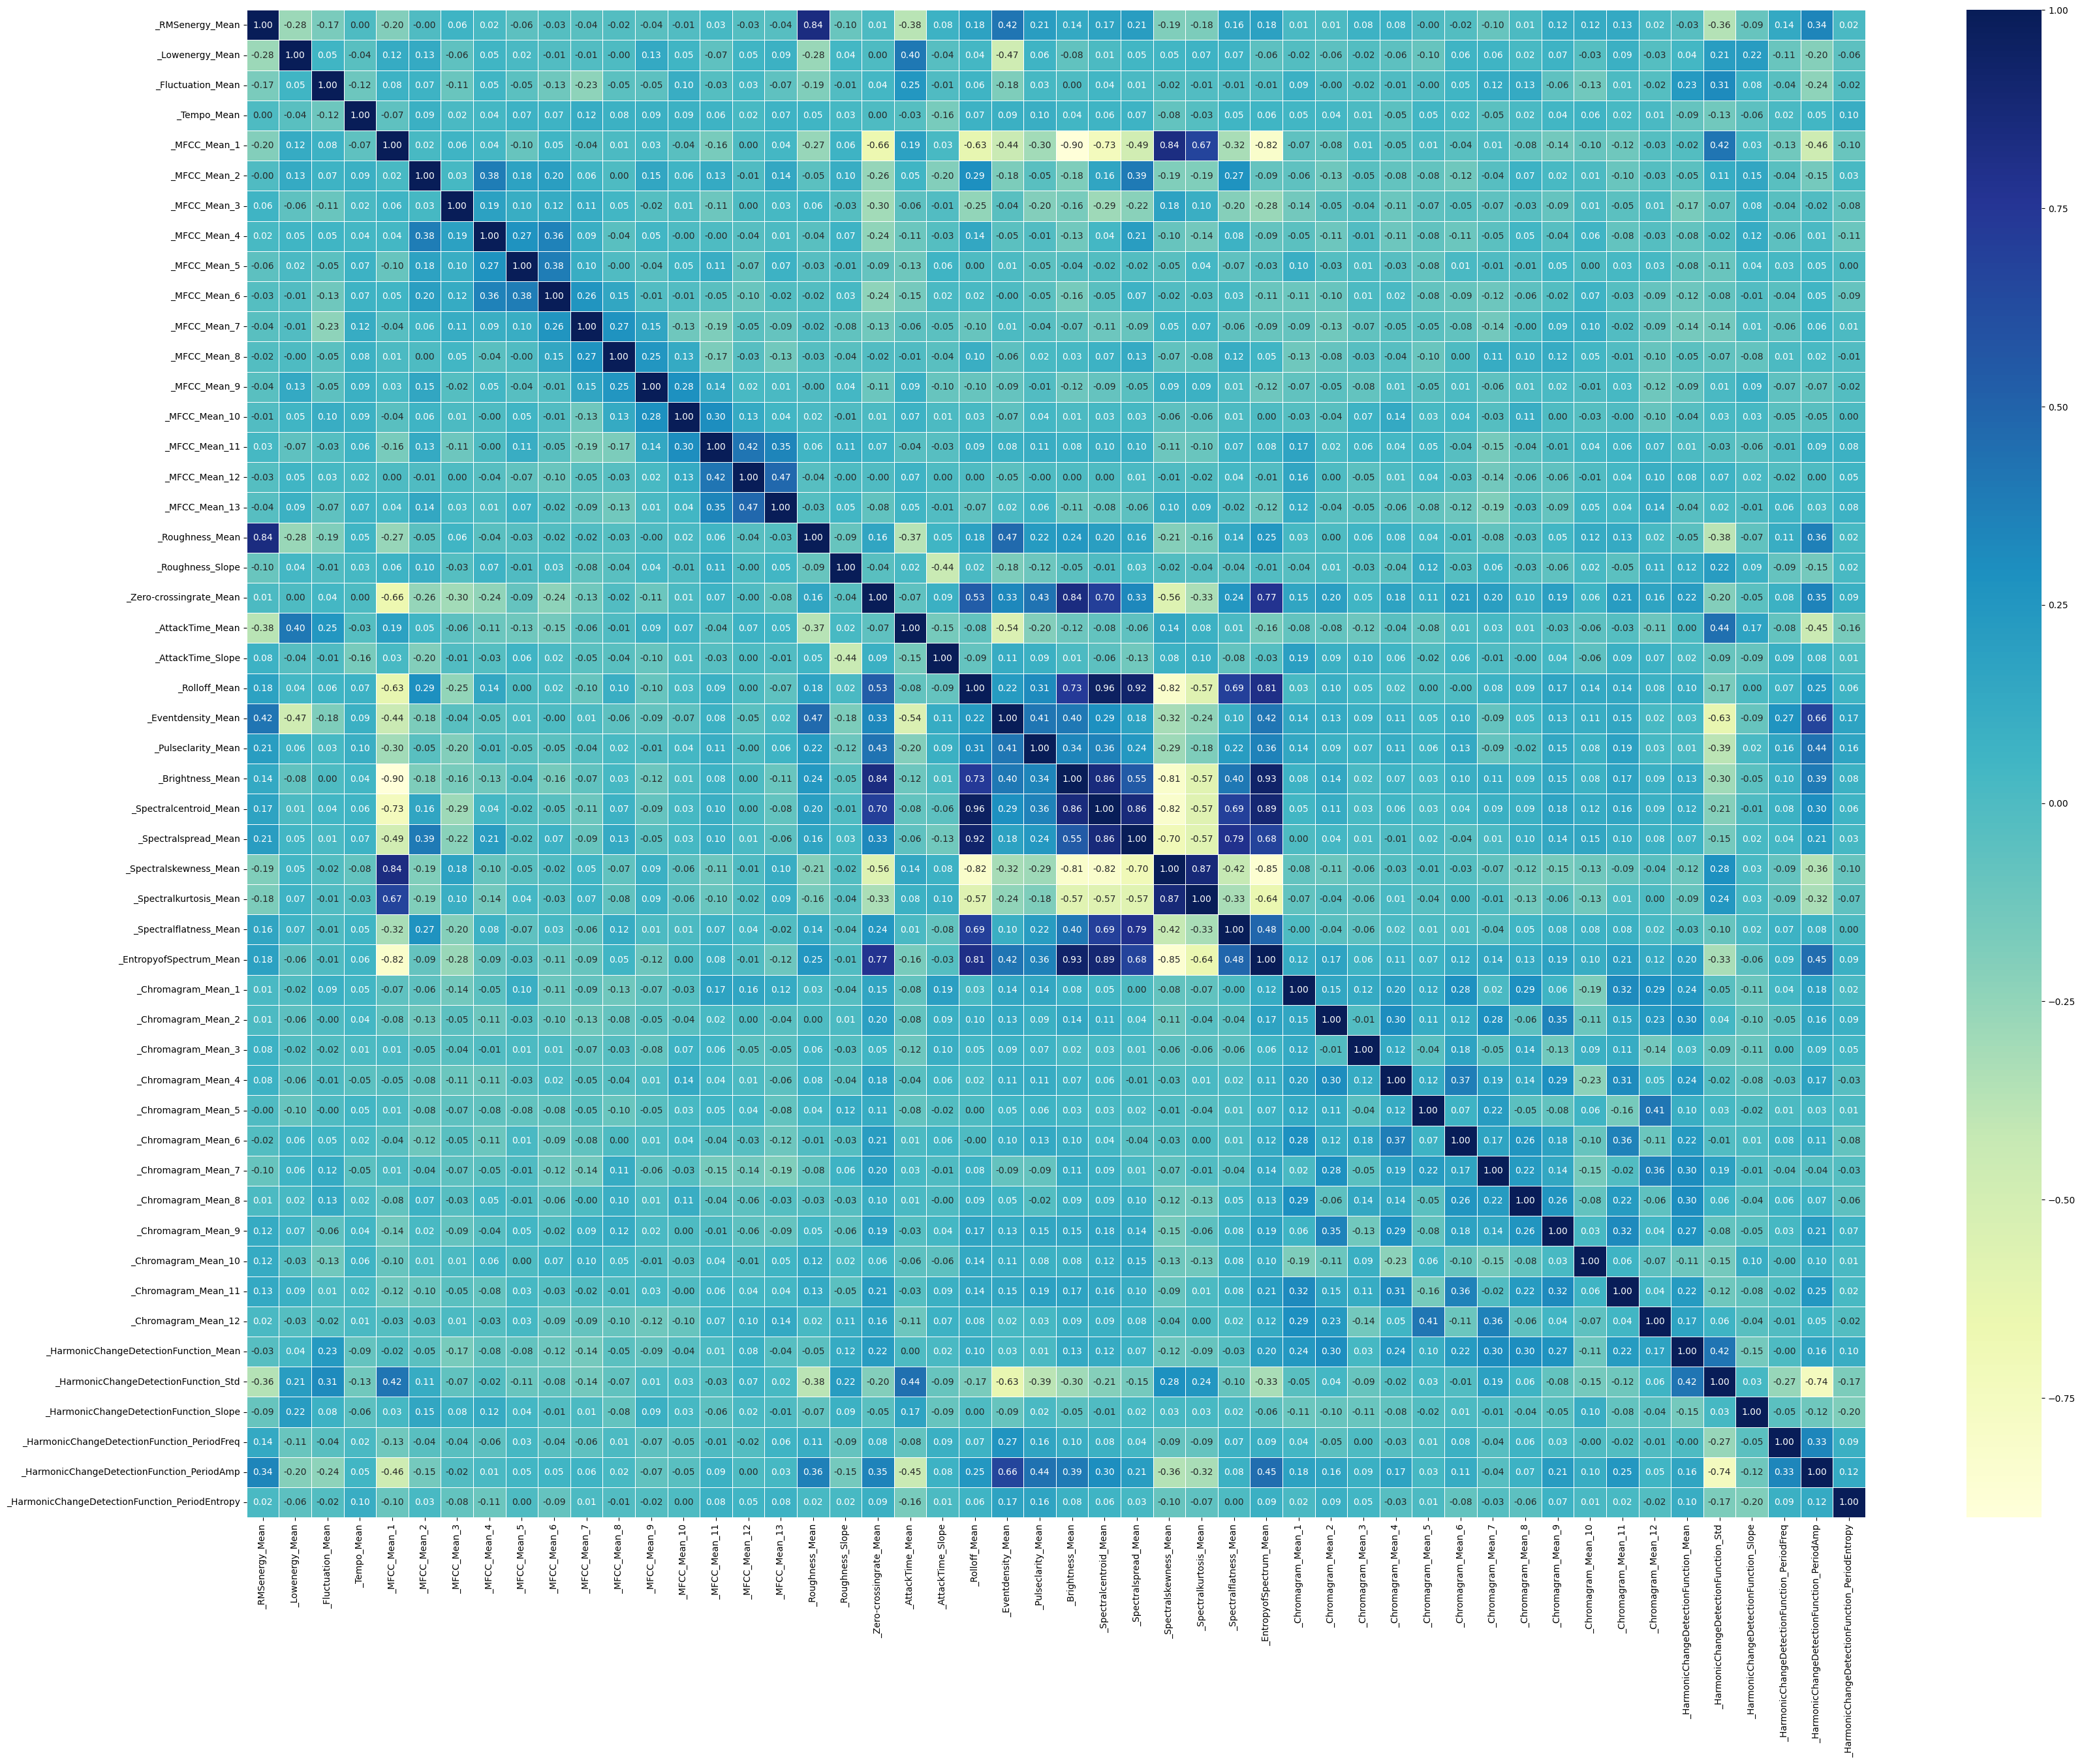

In [ ]:
#Feature correlation matrix visualisation
plt.figure(figsize=(40,30))
corr_mtx=df.corr()
sns.heatmap(corr_mtx,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

#Data Preparation for Training

In [20]:
# splitting data into X(independent variable) and Y(dependent variable))
X=df.drop("Class",axis=1)
Y=df["Class"]

In [21]:
#Convert Catagorial value of (Class) column to numerical

#create a instance of label encoder
label_instance = LabelEncoder()

# Use .fit_transform function to fit label and encoder will return encoded label
label = label_instance.fit_transform(df['Class'])

#encoder will return an array of values let's convert it to dataframe again
Y = pd.DataFrame(label)

#let's check the conversion by printing Y
print(Y)

     0
0    2
1    2
2    2
3    2
4    2
..  ..
395  0
396  0
397  0
398  0
399  0

[400 rows x 1 columns]


In [22]:
#split X and Y into train and test dataset
#let's take standart 70% data for training and 30 % for testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=7)

In [23]:
#shape of X_train dataframe
X_train.shape

(280, 50)

In [24]:
#shape of X_test dataframe
X_test.shape

(120, 50)

In [25]:
#shape of Y_train dataframe
Y_train.shape

(280, 1)

In [26]:
#shape of Y_test dataframe
Y_test.shape

(120, 1)

#Training Functions


In [ ]:
def plotConfusionMatrix(cm, accuracy):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15)

In [ ]:
def results(accuracy, predictions, X_test, Y_test):
  #calculate confusino matrix
  cm = metrics.confusion_matrix(Y_test, predictions)
  print(cm)
  plotConfusionMatrix(cm = cm, accuracy = accuracy)

  # Calcualte Accuracy, Precision and Recall from confusion matrix
  from operator import truediv
  tp = np.diag(cm)
  prec = list(map(truediv, tp, np.sum(cm, axis=0)))
  rec = list(map(truediv, tp, np.sum(cm, axis=1)))
  print("Accuracy = ",tp.sum()/cm.sum())
  print("Precision = {}\nRecall = {}".format(prec,rec))
  print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/4, np.sum(rec)/4))

  # ROC Curve
  roc_data = {}
  # Loop over each class in your multi-class problem
  for class_idx in range(0,4):
      # Predict the probability for the current class
      y_pred_prob = logisticModel.predict_proba(X_test)[:, class_idx]

      # Compute ROC curve and AUC for the current class
      fpr, tpr, thresholds = roc_curve(Y_test == class_idx, y_pred_prob)
      roc_auc = auc(fpr, tpr)

      # Store the ROC curve data and AUC for the current class
      roc_data[class_idx] = (fpr, tpr, roc_auc)

  # Plot ROC curves for each class
  plt.figure(figsize=(6, 6))
  for class_idx, (fpr, tpr, roc_auc) in roc_data.items():
      plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multi-Class ROC Curves')
  plt.legend(loc='best')
  plt.show()



In [ ]:
'''def model_run(model_name, X_train, Y_train, X_test, Y_test):
  models = {"LogisticRegression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}

  for x in models:
    if x == model_name:
      model = models[x]
      break

  model.fit(X_train, Y_train)

  pred = model.predict(X_test)

  acc = model.score(X_test, Y_test)
  print("Accuracy = {}".format(accuracy))

  #calculate confusino matrix
  cm = metrics.confusion_matrix(Y_test, predictions)
  print(cm)
  plotConfusionMatrix(cm = cm, accuracy = accuracy)

  # Calcualte Accuracy, Precision and Recall from confusion matrix
  from operator import truediv
  tp = np.diag(cm)
  prec = list(map(truediv, tp, np.sum(cm, axis=0)))
  rec = list(map(truediv, tp, np.sum(cm, axis=1)))
  print("Accuracy = ",tp.sum()/cm.sum())
  print("Precision = {}\nRecall = {}".format(prec,rec))
  print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, np.sum(rec)/2))

  #roc curve
  y_pred_prob = logisticModel.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
  plt.plot([0,1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Logistic Regression')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Logistic Regression ROC Curve')
  plt.show();'''


'def model_run(model_name, X_train, Y_train, X_test, Y_test):\n  models = {"LogisticRegression": LogisticRegression(),\n         "KNN": KNeighborsClassifier(),\n         "RandomForest": RandomForestClassifier()}\n\n  for x in models:\n    if x == model_name:\n      model = models[x]\n      break \n  \n  model.fit(X_train, Y_train)\n\n  pred = model.predict(X_test)\n  \n  acc = model.score(X_test, Y_test)\n  print("Accuracy = {}".format(accuracy))\n\n  #calculate confusino matrix\n  cm = metrics.confusion_matrix(Y_test, predictions)\n  print(cm)\n  plotConfusionMatrix(cm = cm, accuracy = accuracy)\n\n  # Calcualte Accuracy, Precision and Recall from confusion matrix\n  from operator import truediv\n  tp = np.diag(cm)\n  prec = list(map(truediv, tp, np.sum(cm, axis=0)))\n  rec = list(map(truediv, tp, np.sum(cm, axis=1)))\n  print("Accuracy = ",tp.sum()/cm.sum())\n  print("Precision = {}\nRecall = {}".format(prec,rec))\n  print("Avg Precision = {}\nAvg Recall = {}".format(np.sum(prec)/2, 

In [ ]:
#model_run('KNN', X_train, Y_train, X_test, X_test)

# Logistic Regresson

In [ ]:
#creat an instace of the model
logisticModel = LogisticRegression()

#train the model calling fit function
logisticModel.fit(X_train, Y_train)

#make prediction on test data
predictions = logisticModel.predict(X_test)

#calculate the accuracy of the model with .score function
accuracy = logisticModel.score(X_test, Y_test)
print("Accuracy = {}".format(accuracy))

Accuracy = 0.5083333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[14  4  8  6]
 [ 5 17  1  4]
 [ 3  2 19  7]
 [ 4  6  9 11]]
Accuracy =  0.5083333333333333
Precision = [0.5384615384615384, 0.5862068965517241, 0.5135135135135135, 0.39285714285714285]
Recall = [0.4375, 0.6296296296296297, 0.6129032258064516, 0.36666666666666664]
Avg Precision = 0.5077597728459797
Avg Recall = 0.511674880525687


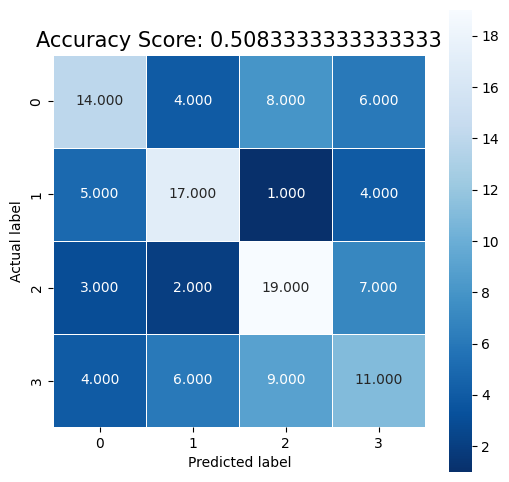

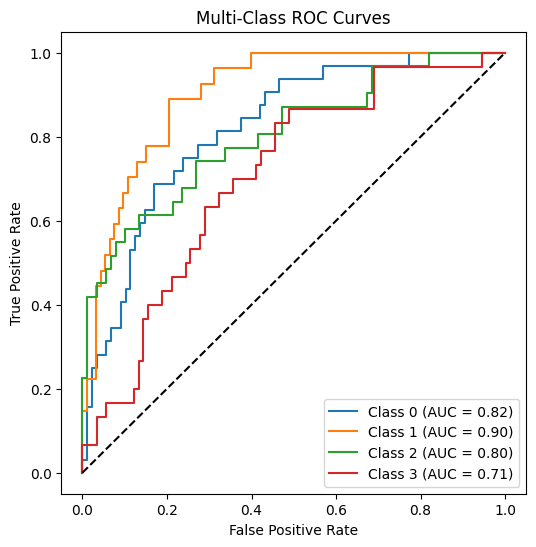

In [ ]:
results(accuracy, predictions, X_test, Y_test)

# K Nearnest Neighber

In [ ]:
#creat an instace of the model
knn = KNeighborsClassifier()
#train the model calling fit function
knn.fit(X_train, Y_train)
#make prediction on test data
predictions = knn.predict(X_test)
#calculate the accuracy of the model with .score function
accuracy = knn.score(X_test, Y_test)
print("Accuracy = {}".format(accuracy))

Accuracy = 0.5083333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[12  8  6  6]
 [ 3 20  1  3]
 [ 7  1 21  2]
 [ 8  5  9  8]]
Accuracy =  0.5083333333333333
Precision = [0.4, 0.5882352941176471, 0.5675675675675675, 0.42105263157894735]
Recall = [0.375, 0.7407407407407407, 0.6774193548387096, 0.26666666666666666]
Avg Precision = 0.4942138733160405
Avg Recall = 0.5149566905615293


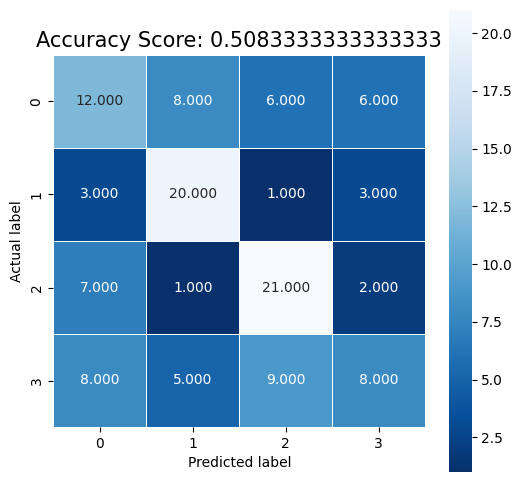

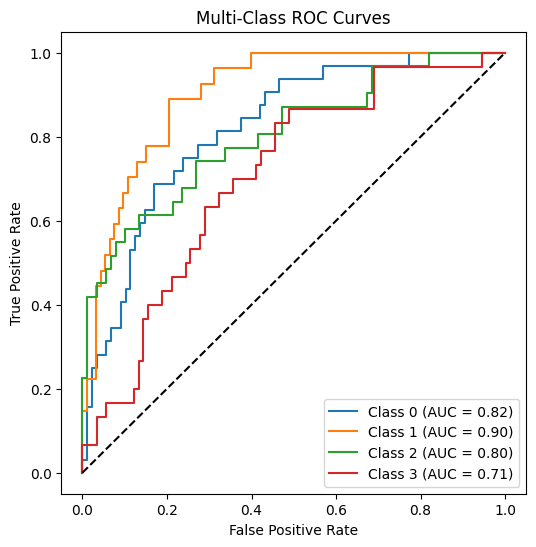

In [ ]:
#results of KNN
results(accuracy, predictions, X_test, Y_test)

# Decision Tree

In [ ]:
#creat an instace of the model
dtree = tree.DecisionTreeClassifier()

#train the model calling fit function
dtree.fit(X_train, Y_train)

#make prediction on test data
predictions = dtree.predict(X_test)

#calculate the accuracy of the model with .score function
accuracy = dtree.score(X_test, Y_test)
print("Accuracy = ", accuracy)

Accuracy =  0.725


[[28  2  0  2]
 [ 2 21  3  1]
 [ 3  2 22  4]
 [ 5  2  7 16]]
Accuracy =  0.725
Precision = [0.7368421052631579, 0.7777777777777778, 0.6875, 0.6956521739130435]
Recall = [0.875, 0.7777777777777778, 0.7096774193548387, 0.5333333333333333]
Avg Precision = 0.7244430142384948
Avg Recall = 0.7239471326164875


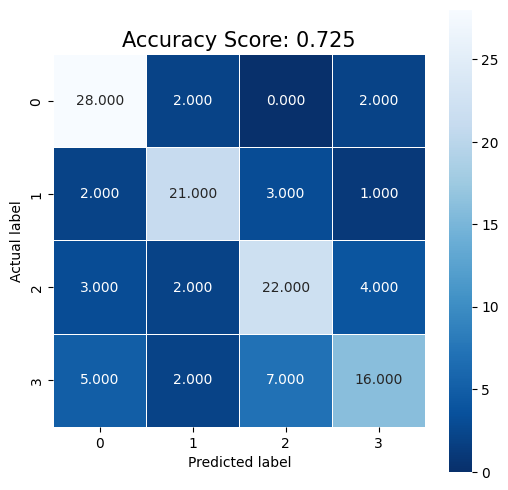

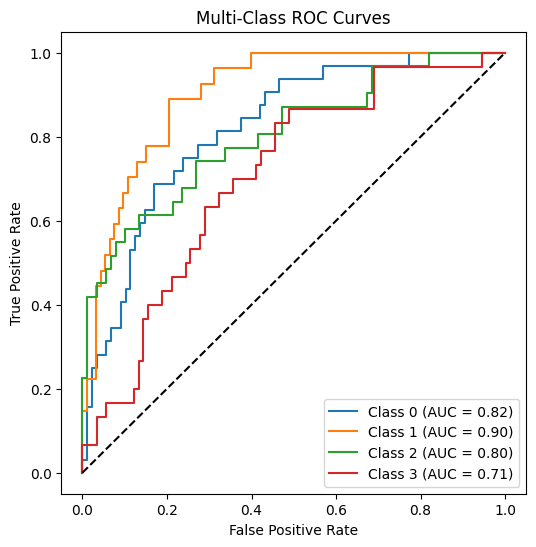

In [ ]:
#results of Decision Tree
results(accuracy, predictions, X_test, Y_test)

# Random Forest


In [ ]:
#creat an instace of the model
randomForest = RandomForestClassifier()

#train the model calling fit function
randomForest.fit(X_train, Y_train)

#make prediction on test data
predictions = randomForest.predict(X_test)

#calculate the accuracy of the model with .score function
accuracy = randomForest.score(X_test, Y_test)
print("Accuracy = ", accuracy)

<ipython-input-44-5247fe1f1652>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train, Y_train)


Accuracy =  0.7833333333333333


[[29  1  0  2]
 [ 1 25  0  1]
 [ 3  1 21  6]
 [ 2  3  6 19]]
Accuracy =  0.7833333333333333
Precision = [0.8285714285714286, 0.8333333333333334, 0.7777777777777778, 0.6785714285714286]
Recall = [0.90625, 0.9259259259259259, 0.6774193548387096, 0.6333333333333333]
Avg Precision = 0.7795634920634922
Avg Recall = 0.7857321535244922


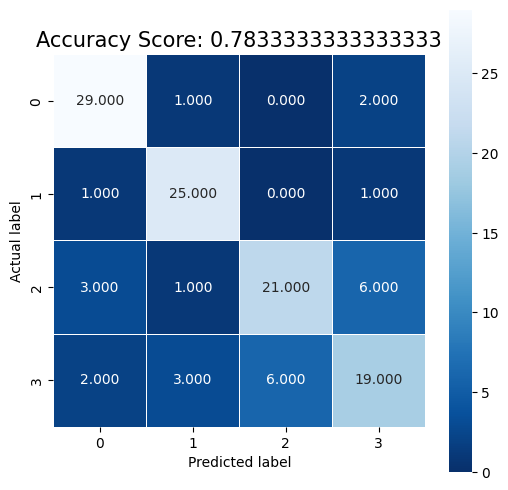

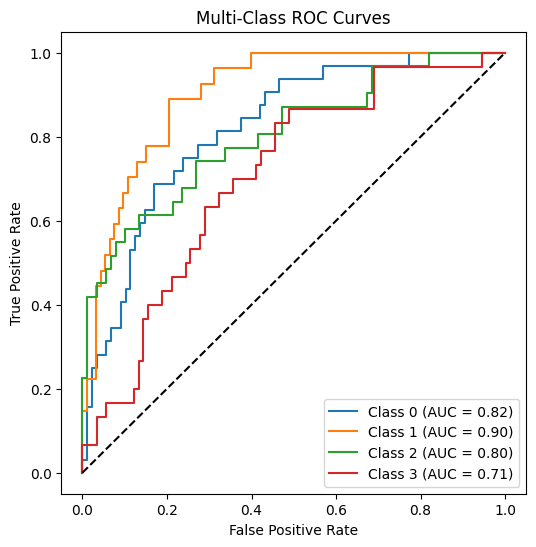

In [ ]:
#results of Decision Tree
results(accuracy, predictions, X_test, Y_test)

# Support Vectore Machine (Linear)

In [ ]:
#creat an instace of the model
#svm_model = svm.SVC(decision_function_shape='ovo', gamma = 0)
svm_model = svm.SVC(kernel='linear', C=2, decision_function_shape='ovo', probability=True)

#train the model calling fit function
svm_model.fit(X_train, Y_train)

#make prediction on test data
predictions = svm_model.predict(X_test)

#calculate the accuracy of the model with .score function
accuracy = svm_model.score(X_test, Y_test)
print("Accuracy = ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.7166666666666667


[[25  0  3  4]
 [ 1 26  0  0]
 [ 4  2 23  2]
 [ 5  4  9 12]]
Accuracy =  0.7166666666666667
Precision = [0.7142857142857143, 0.8125, 0.6571428571428571, 0.6666666666666666]
Recall = [0.78125, 0.9629629629629629, 0.7419354838709677, 0.4]
Avg Precision = 1.425297619047619
Avg Recall = 1.4430742234169653


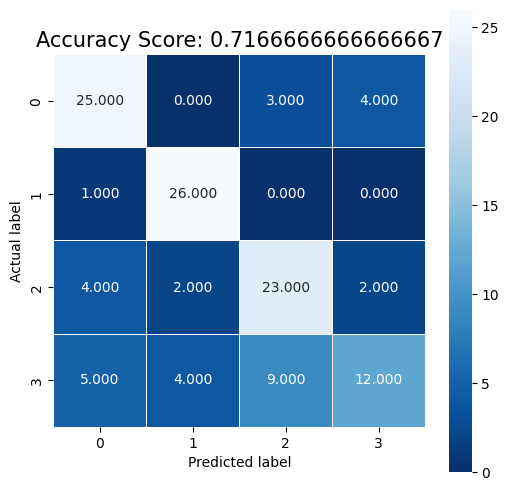

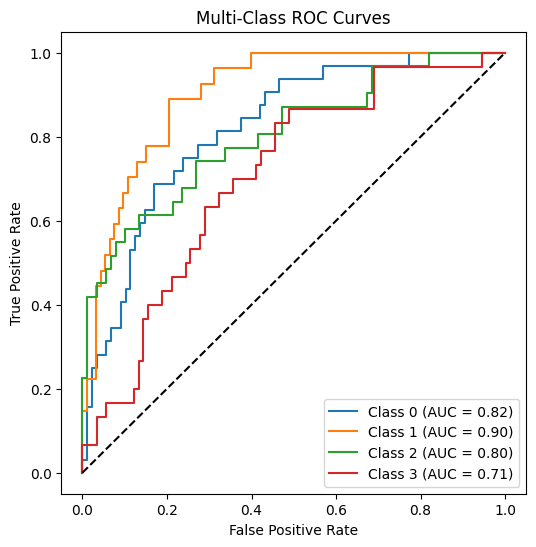

In [ ]:
#results of SVM
results(accuracy, predictions, X_test, Y_test)

# Naive Bayes

In [ ]:
#creat an instace of the model
gnb = GaussianNB()

#train the model calling fit function
gnb.fit(X_train, Y_train)

#make prediction on test data
predictions = gnb.predict(X_test)

#calculate the accuracy of the model with .score function
accuracy = gnb.score(X_test, Y_test)
print("Accuracy = ", accuracy)

Accuracy =  0.7166666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[26  5  1  0]
 [ 2 25  0  0]
 [ 4  3 20  4]
 [ 3  6  6 15]]
Accuracy =  0.7166666666666667
Precision = [0.7428571428571429, 0.6410256410256411, 0.7407407407407407, 0.7894736842105263]
Recall = [0.8125, 0.9259259259259259, 0.6451612903225806, 0.5]
Avg Precision = 0.7285243022085128
Avg Recall = 0.7208968040621266


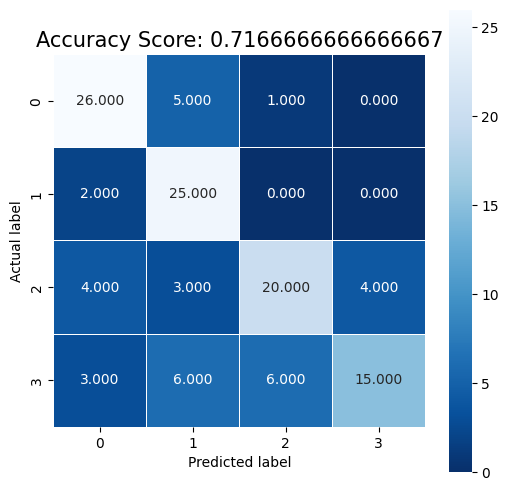

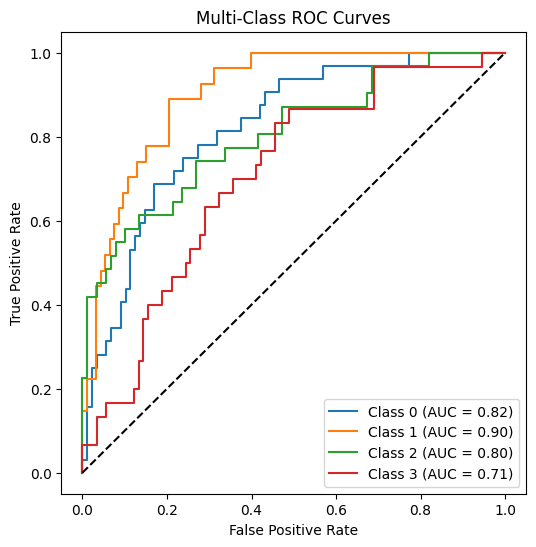

In [ ]:
#results of SVM
results(accuracy, predictions, X_test, Y_test)

**Random Forest has the best performance measures among all the models with accuracy around 84.78% and decent precesion and recall score.**

#All other models

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

 97%|█████████▋| 28/29 [00:04<00:00,  2.73it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3992
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 50
[LightGBM] [Info] Start training from score -1.415282
[LightGBM] [Info] Start training from score -1.344330
[LightGBM] [Info] Start training from score -1.400683
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

100%|██████████| 29/29 [00:05<00:00,  5.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.82,0.82,None,0.81,0.44
SVC,0.80,0.80,None,0.80,0.06
NuSVC,0.80,0.80,None,0.80,0.05
XGBClassifier,0.80,0.80,None,0.80,2.21
LGBMClassifier,0.79,0.79,None,0.79,0.69
ExtraTreesClassifier,0.78,0.79,None,0.78,0.27
LinearDiscriminantAnalysis,0.78,0.78,None,0.77,0.10
RidgeClassifierCV,0.78,0.78,None,0.76,0.09
GaussianNB,0.77,0.77,None,0.76,0.03


#Neural Network Based Models

#2 layer ANN

In [13]:
# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(64, input_dim=50, activation='relu')) # input layer requires input_dim param
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(4, activation='softmax')) # softmax for multiclass classification

# compile the model, adam gradient descent (optimized)
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

# One-hot encode the labels for both training and testing data
y_train = to_categorical(Y_train, num_classes=4)
y_test = to_categorical(Y_test, num_classes=4)

# call the function to fit to the data (training the network)
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# save the model
#model.save('weights_ANN.keras')

Epoch 1/10
14/14 [==============================] - 10s 39ms/step - loss: 191.0559 - accuracy: 0.2750 - val_loss: 41.9874 - val_accuracy: 0.3500
Epoch 2/10
14/14 [==============================] - 0s 12ms/step - loss: 88.0566 - accuracy: 0.3964 - val_loss: 27.8016 - val_accuracy: 0.4250
Epoch 3/10
14/14 [==============================] - 0s 9ms/step - loss: 41.5466 - accuracy: 0.3714 - val_loss: 23.5110 - val_accuracy: 0.4167
Epoch 4/10
14/14 [==============================] - 0s 10ms/step - loss: 16.0630 - accuracy: 0.4429 - val_loss: 8.4748 - val_accuracy: 0.4417
Epoch 5/10
14/14 [==============================] - 0s 12ms/step - loss: 5.7444 - accuracy: 0.3464 - val_loss: 2.5344 - val_accuracy: 0.4250
Epoch 6/10
14/14 [==============================] - 0s 14ms/step - loss: 2.0073 - accuracy: 0.4464 - val_loss: 1.7915 - val_accuracy: 0.3917
Epoch 7/10
14/14 [==============================] - 0s 16ms/step - loss: 1.5799 - accuracy: 0.3464 - val_loss: 1.6628 - val_accuracy: 0.3333
Epoch

#CNN

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

model = Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid', input_shape=(50,400,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'valid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(.4),
    Dense(units=128, activation='relu'),
    Dropout(.2),
    Dense(units=4, activation='softmax')
])

# compile the model, adam gradient descent (optimized)
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

# One-hot encode the labels for both training and testing data
y_train = to_categorical(Y_train, num_classes=4)
y_test = to_categorical(Y_test, num_classes=4)

# call the function to fit to the data (training the network)
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))


AttributeError: ignored

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already prepared your data and it's in the format you need.
# X should be a 4D tensor (num_samples, width, height, num_channels)
# Y should be a 1D array of class labels (0, 1, 2, 3 for 4 classes)

# Number of classes
num_classes = 4

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 400, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

# One-hot encode the labels for both training and testing data
Y_train = to_categorical(Y_train, num_classes=num_classes)
Y_test = to_categorical(Y_test, num_classes=num_classes)

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Save the model
# model.save('cnn_model_multi_class.h5')


Epoch 1/10


ValueError: ignored